# IFNa2 cis vs trans induction quality checking

In [1]:
suppressMessages(library(DESeq2))
suppressMessages(library(ggplot2))
suppressMessages(library(ggrepel))
suppressMessages(library(viridis))
suppressMessages(library(tidyr))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(gridExtra))
suppressMessages(library(grid))
suppressMessages(library(cowplot))
suppressMessages(library(fgsea))
suppressMessages(library(scales))
suppressMessages(library(reshape2))
suppressMessages(library(pheatmap))
suppressMessages(library(data.table))
suppressMessages(library(EnhancedVolcano))

In [4]:
# Define input/output paths and files for DESeq2.

species <- "Rhesus"

baseDir <- "/scratch/Users/dara6367/IFNa2-cis-trans/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"conditionsTables/")
alphaValue <- 0.05

conditionsTableFile <- paste0(tableDir,"conditionsTable.PRO-",species,"-IFN.csv")
featureCounts <- paste0(countsDir,"PRO-",species,"-IFN.ncbiRefSeq.without5prime25.featureCounts.RData")

# Read in count data and their conditions table.
load(featureCounts)
conditionsTable <- read.csv(conditionsTableFile, header = TRUE)

# Assign the same ID to both the conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTable$sample
rownames(conditionsTable) <- conditionsTable$sample

# Create DESeq2Dataset object and load RNA-seq counts.
dds <- DESeqDataSetFromMatrix(countData = counts$counts, 
                              colData = conditionsTable,
                              design = ~ treatment)

# Run DESeq2 using the counts.
dds <- DESeq(dds)

# Defines conditions to compare.
contrast_hIFN <- c("treatment", "hIFN", "BSA")
contrast_rIFN <- c("treatment", "rIFN", "BSA")

# 'Shrink' results using 'normal' mode.
resultsUnshrunken_hIFN <- results(dds, 
                                  contrast = contrast_hIFN, 
                                  alpha = alphaValue)
resultsUnshrunken_rIFN <- results(dds, 
                                  contrast = contrast_rIFN, 
                                  alpha = alphaValue)

results_hIFN <- lfcShrink(dds, 
                          contrast = contrast_hIFN, 
                          res = resultsUnshrunken_hIFN, 
                          type = "normal")
results_rIFN <- lfcShrink(dds, 
                          contrast = contrast_rIFN, 
                          res = resultsUnshrunken_rIFN, 
                          type = "normal")

# Orders list of genes by their adjusted p-values.
results_hIFN <- results_hIFN[order(results_hIFN$padj),]
results_rIFN <- results_rIFN[order(results_rIFN$padj),]

# Filter out gene entries whose log2FoldChange has an NA value.
results_hIFN_filt <- results_hIFN[!is.na(results_hIFN$log2FoldChange),]
results_rIFN_filt <- results_rIFN[!is.na(results_rIFN$log2FoldChange),]

# Orders the gene list by log2FoldChange in decreasing order.
# And prepares it in a format that GSEA accepts.
results_hIFN_filt <- results_hIFN_filt[order(results_hIFN_filt$log2FoldChange, decreasing = TRUE),]
results_rIFN_filt <- results_rIFN_filt[order(results_rIFN_filt$log2FoldChange, decreasing = TRUE),]
rankedGenes_hIFN <- results_hIFN_filt$log2FoldChange
rankedGenes_rIFN <- results_rIFN_filt$log2FoldChange
names(rankedGenes_hIFN) <- rownames(results_hIFN_filt)
names(rankedGenes_rIFN) <- rownames(results_rIFN_filt)
rankedGenes_hIFN_gsea <- rankedGenes_hIFN
rankedGenes_rIFN_gsea <- rankedGenes_rIFN

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



# DESeq2 MA plots

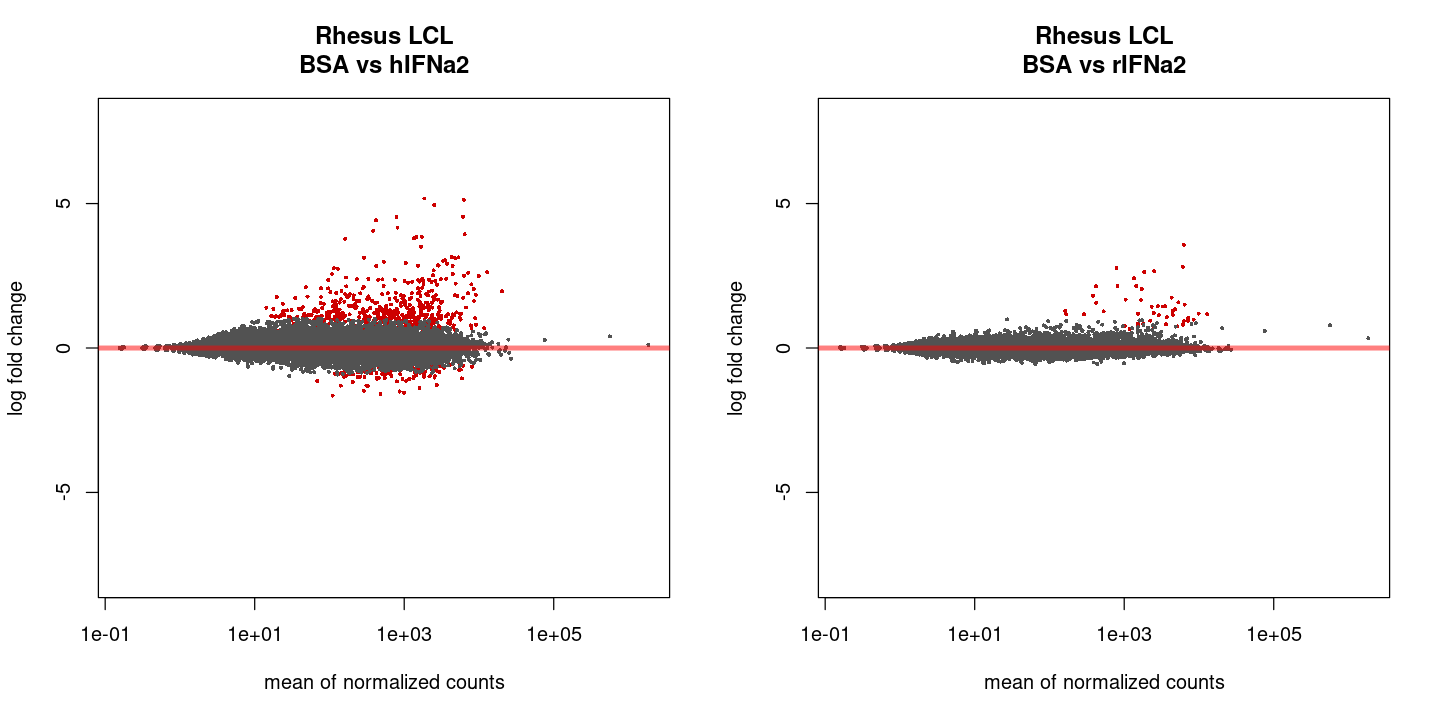

In [15]:
# Display MA plots with shrunken fold changes.

par(mfrow=c(1,2))
options(repr.plot.width = 12, repr.plot.height = 6)
DESeq2::plotMA(results_hIFN, ylim = c(-8,8), main = paste0(species," LCL\nBSA vs hIFNa2"))
DESeq2::plotMA(results_rIFN, ylim = c(-8,8), main = paste0(species," LCL\nBSA vs rIFNa2"))

# DESeq2 volcano plots

Warning message:
“Removed 2 rows containing missing values (geom_vline).”
Warning message:
“Removed 1 rows containing missing values (geom_hline).”
Warning message:
“Removed 2 rows containing missing values (geom_vline).”
Warning message:
“Removed 1 rows containing missing values (geom_hline).”


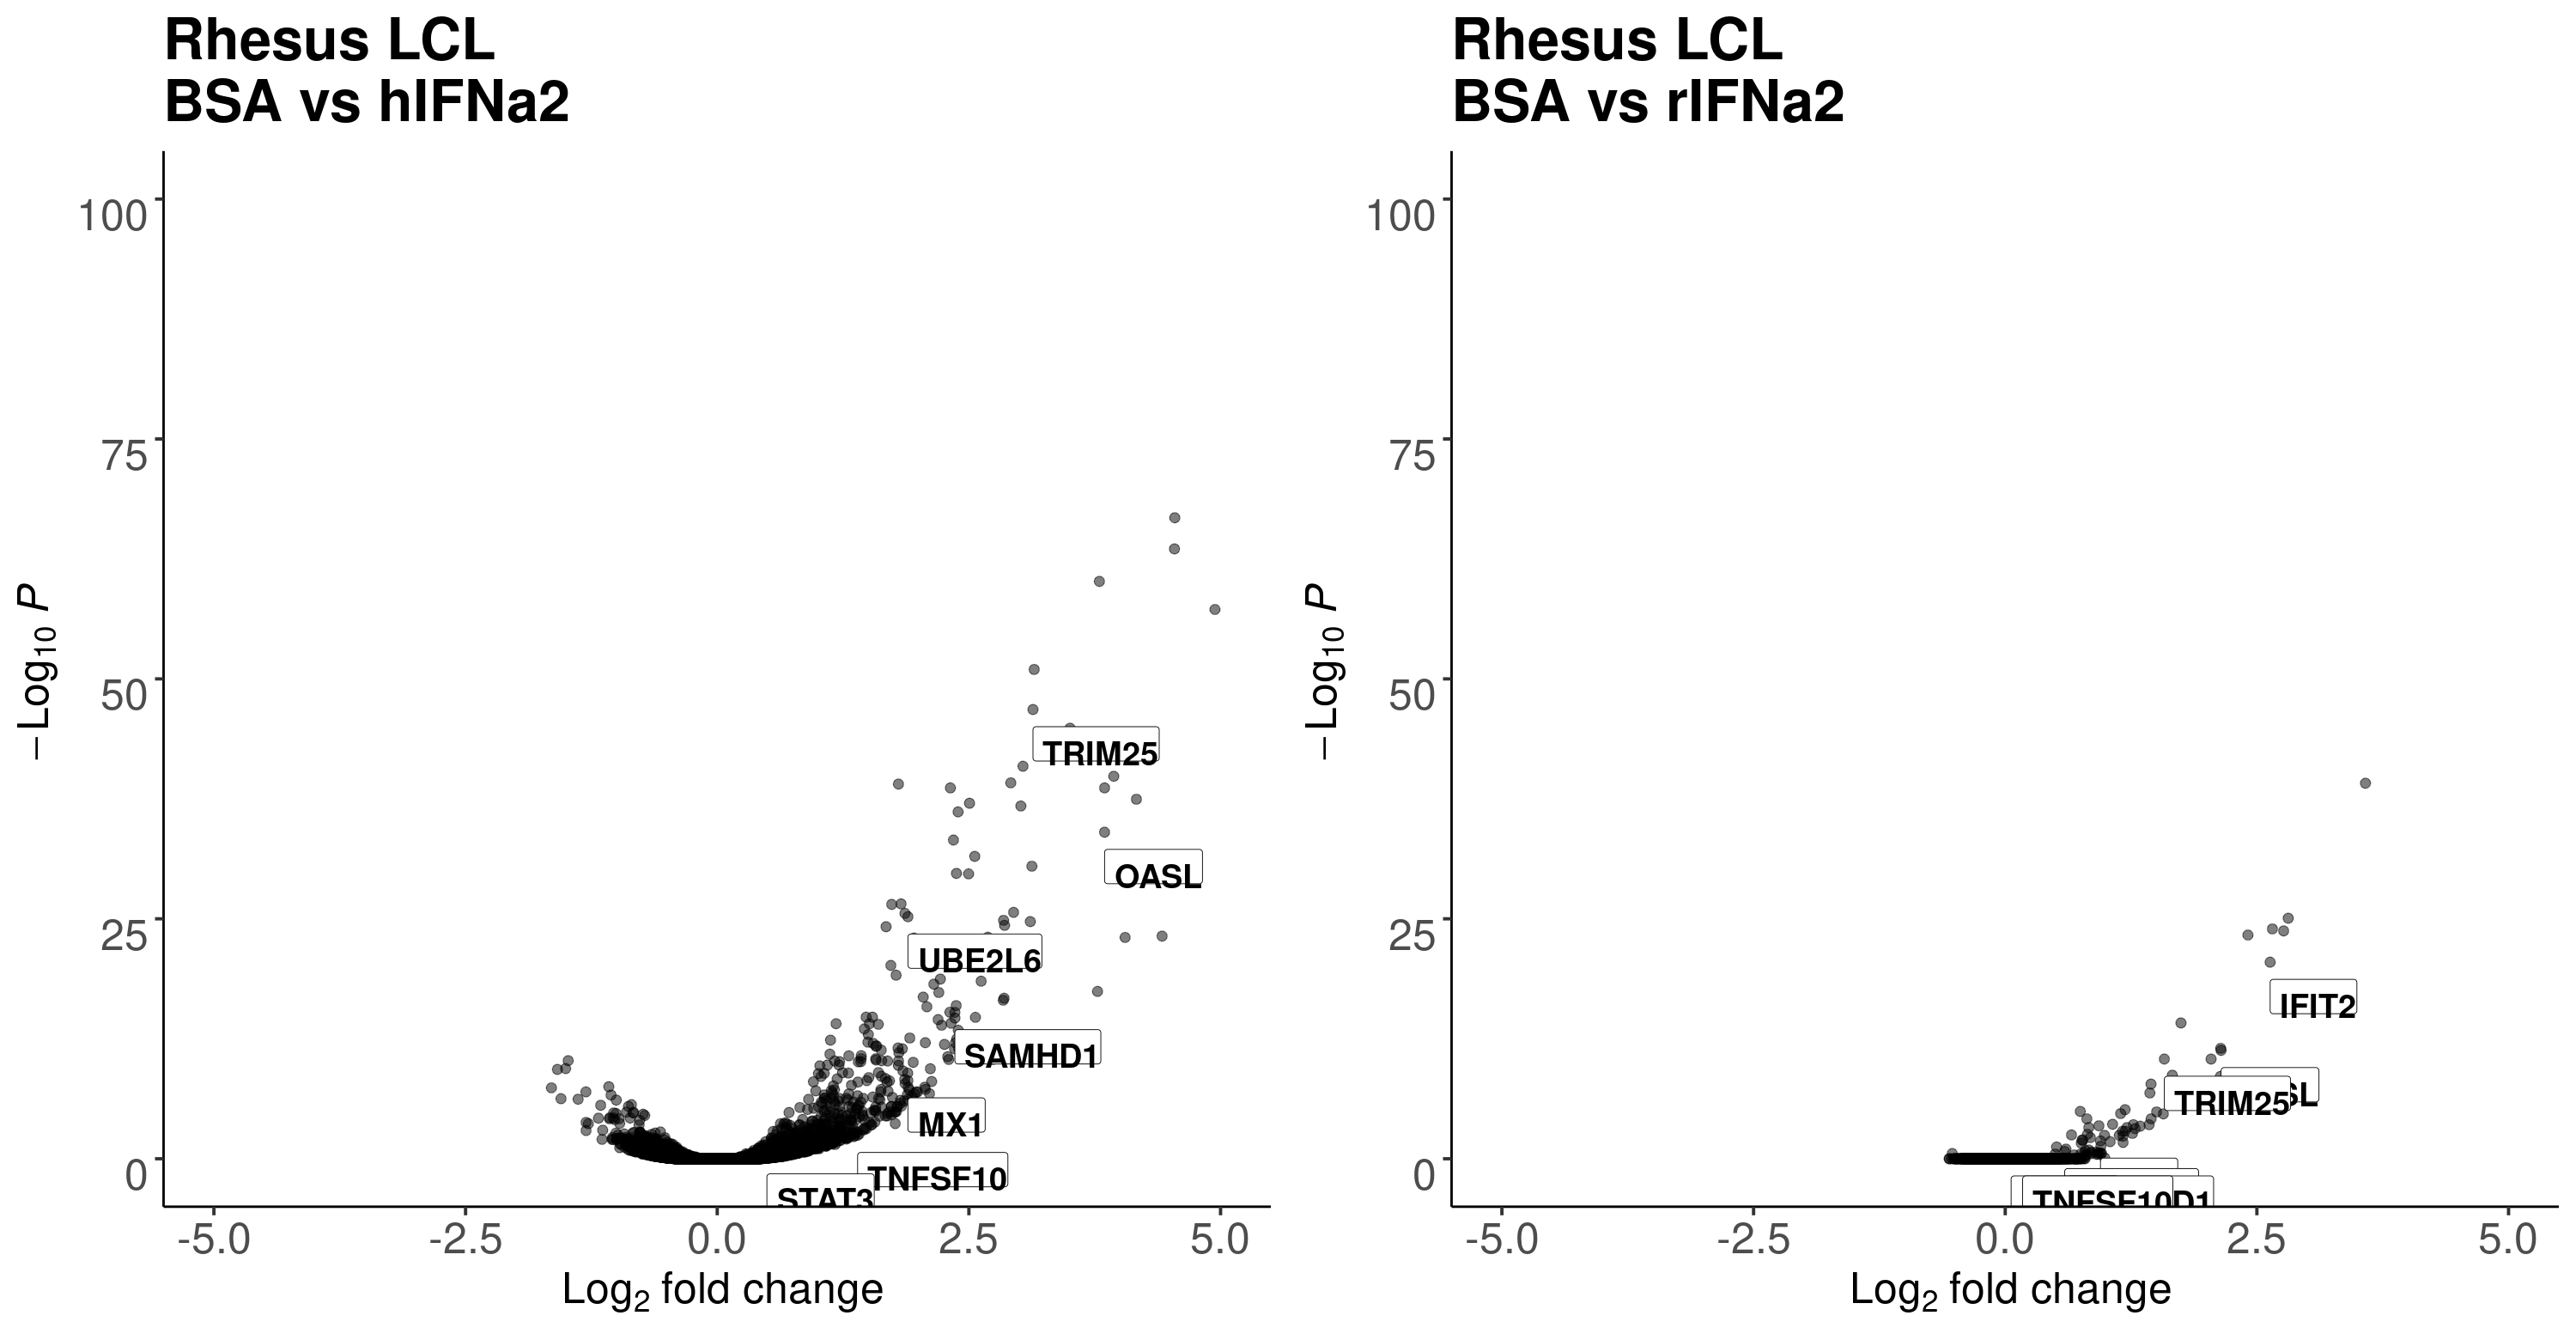

In [16]:
# Makes a volcano plot with the DESeq2 results.

volcano_hIFN <- EnhancedVolcano(results_hIFN,
                lab = rownames(results_hIFN),
                x = "log2FoldChange",
                y = "padj",
                axisLabSize = 30,
                title = paste0(species," LCL\nBSA vs hIFNa2"),
                titleLabSize = 40,
                subtitle = NULL,
                caption = NULL,
                xlim = c(-5,5),
                ylim = c(0,100),
                pCutoff = 10e-200,
                FCcutoff = 10,
                cutoffLineType = "twodash",
                pointSize = 3.0,
                labSize = 8.0,
                selectLab = c("MX1","IFIT2","TRIM25","OASL","STAT3","SAMHD1","UBE2L6","TNFSF10"),
                boxedLabels = TRUE,
                labFace = "bold",
                col=c("black", "black", "black", "red3"),
                legendPosition = 'none',
                colAlpha = 0.5,
                gridlines.major = FALSE,
                gridlines.minor = FALSE,
                drawConnectors = FALSE)

volcano_rIFN <- EnhancedVolcano(results_rIFN,
                lab = rownames(results_rIFN),
                x = "log2FoldChange",
                y = "padj",
                axisLabSize = 30,
                title = paste0(species," LCL\nBSA vs rIFNa2"),
                titleLabSize = 40,
                subtitle = NULL,
                caption = NULL,
                xlim = c(-5,5),
                ylim = c(0,100),
                pCutoff = 10e-200,
                FCcutoff = 10,
                cutoffLineType = "twodash",
                pointSize = 3.0,
                labSize = 8.0,
                selectLab = c("MX1","IFIT2","TRIM25","OASL","STAT3","SAMHD1","UBE2L6","TNFSF10"),
                boxedLabels = TRUE,
                labFace = "bold",
                col=c("black", "black", "black", "red3"),
                legendPosition = 'none',
                colAlpha = 0.5,
                gridlines.major = FALSE,
                gridlines.minor = FALSE,
                drawConnectors = FALSE)

# Plotting
options(repr.plot.width = 25, repr.plot.height = 13)
grid.arrange(volcano_hIFN, volcano_rIFN, ncol = 2)

# GSEA plots

In [17]:
# Available gene sets:
# h.all.v7.5.1.symbols.gmt
# c2.all.v7.5.1.symbols.gmt
# c2.cgp.v7.5.1.symbols.gmt
# c2.cp.v7.5.1.symbols.gmt
# c3.tft.v7.5.1.symbols.gmt
# c5.go.bp.v7.5.1.symbols.gmt

# Reads in the data
gmt_path <- "/Shares/txpnevol/daniel/panSpeciesGeneAnnotation/geneSets/"
geneSet <- "h.all.v7.5.1.symbols.gmt"
pathways_GMT <- scan(paste0(gmt_path,geneSet), what = "", sep = "\n")

# Separates elements by one or more whitepace
pathways_list <- strsplit(pathways_GMT, "[[:space:]]+")

# Extracts the first vector element and set it as the list element name
names(pathways_list) <- sapply(pathways_list, function(pathways_GMT) pathways_GMT[[1]])
                               
# Removes the first vector element from each list element
pathways_list <- lapply(pathways_list, function(pathways_GMT) pathways_GMT[-1])

Warning message in fgsea(pathways = pathways_list, stats = rankedGenes_hIFN_gsea, :
“There are ties in the preranked stats (13.7% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


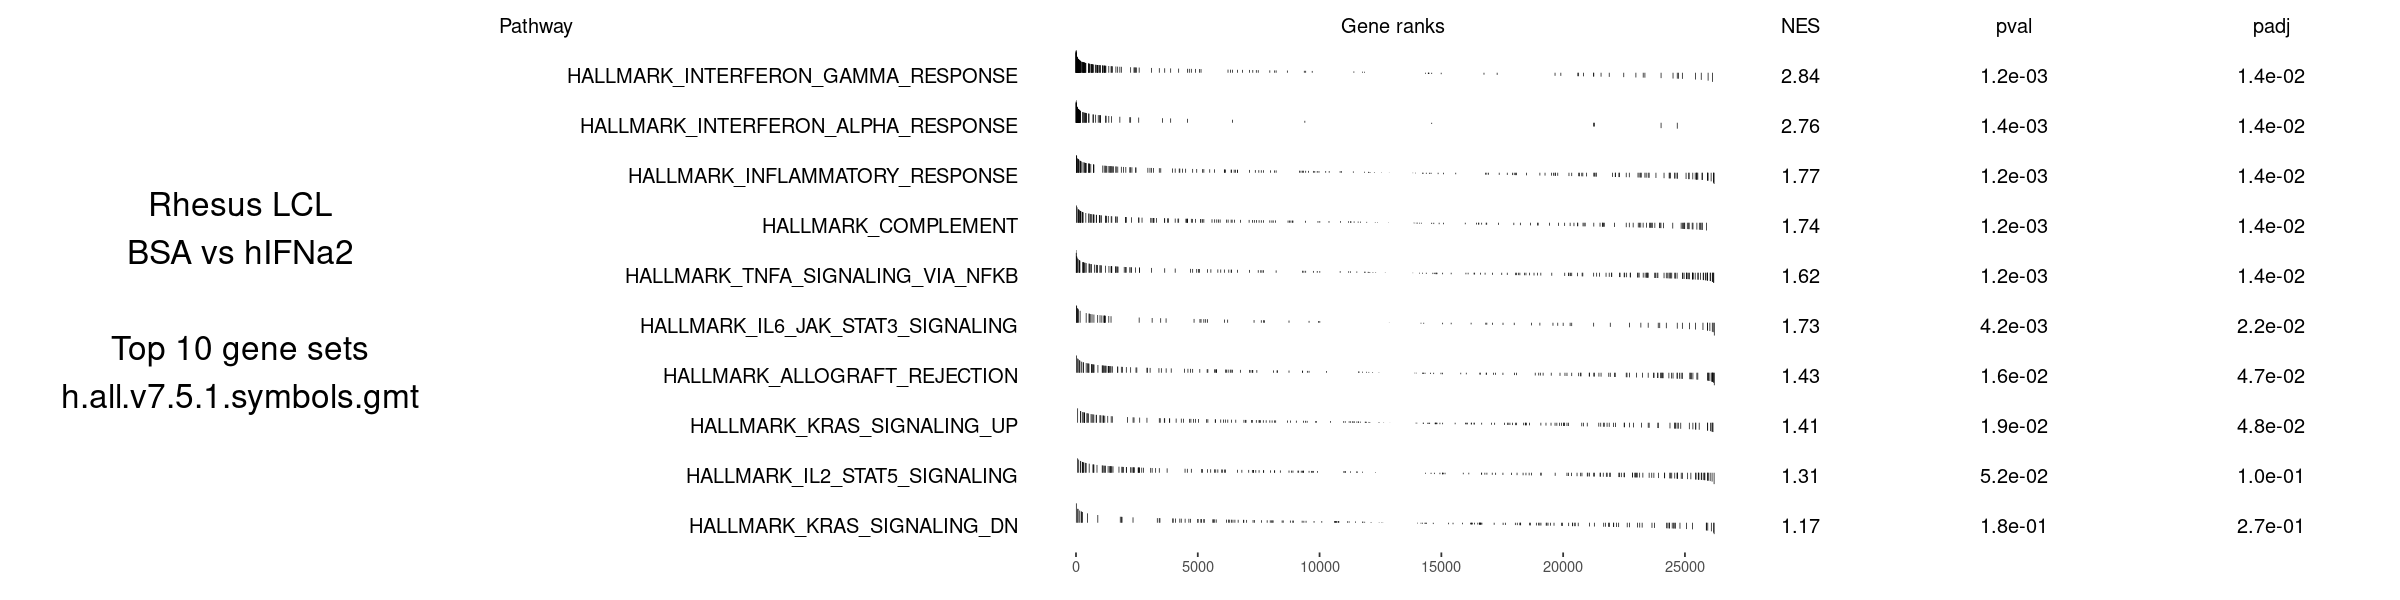

In [18]:
# Runs GSEA using the ranked gene list from DESeq2 by fold-change, and the GSEA gene set list.
fgseaRes_hIFN <- fgsea(pathways = pathways_list, 
                  stats = rankedGenes_hIFN_gsea,
                  minSize = 15,
                  maxSize = 1000,
                  nperm = 1000)

fgseaRes_hIFN$NES <- as.numeric(fgseaRes_hIFN$NES)
fgseaRes_hIFN <- fgseaRes_hIFN[with(fgseaRes_hIFN, order(fgseaRes_hIFN$NES, decreasing = TRUE)), ]
                        
# Plots the enrichment curves for the 10 pathways with the highest ES score.
# Adds the plot title to the left displaying the species, comparison, and gene set used.
                        
topPathways_hIFN <- fgseaRes_hIFN[NES > 0][head(order(padj), n = 10), pathway]
                        
options(repr.plot.width = 20, repr.plot.height = 5)
                        
setHook("grid.newpage", function() pushViewport(viewport(x = 1,y = 1,width = 0.9, 
                                                         height = 0.9, name = "vp", 
                                                         just = c("right","top"))), action = "prepend")
        
plotGseaTable(pathways = pathways_list[topPathways_hIFN], 
              stats = rankedGenes_hIFN_gsea, 
              fgseaRes = fgseaRes_hIFN, 
              gseaParam = 0.5)
        
setHook("grid.newpage", NULL, "replace")
grid.text(paste0(species," LCL\nBSA vs hIFNa2\n\nTop 10 gene sets\n",geneSet), x = 0.1, y = 0.5, gp = gpar(fontsize = 20))

Warning message in fgsea(pathways = pathways_list, stats = rankedGenes_rIFN_gsea, :
“There are ties in the preranked stats (13.45% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


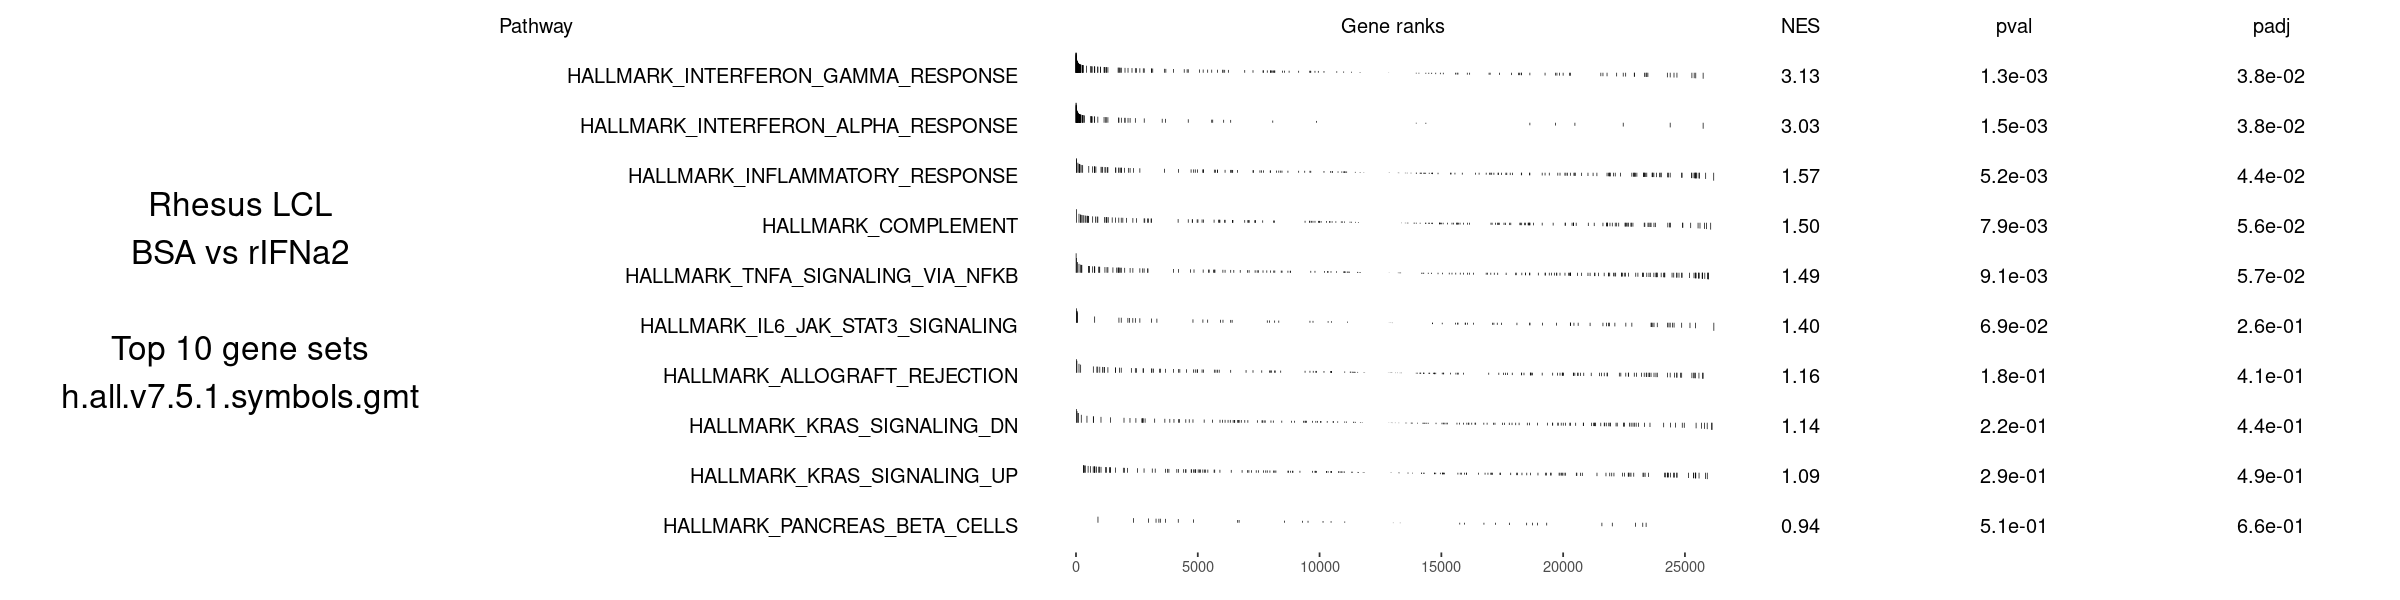

In [19]:
# Runs GSEA using the ranked gene list from DESeq2 by fold-change, and the GSEA gene set list.
fgseaRes_rIFN <- fgsea(pathways = pathways_list, 
                  stats = rankedGenes_rIFN_gsea,
                  minSize = 15,
                  maxSize = 1000,
                  nperm = 1000)

fgseaRes_rIFN$NES <- as.numeric(fgseaRes_rIFN$NES)
fgseaRes_rIFN <- fgseaRes_rIFN[with(fgseaRes_rIFN, order(fgseaRes_rIFN$NES, decreasing = TRUE)), ]

# Plots the enrichment curves for the 10 pathways with the highest ES score.
# Adds the plot title to the left displaying the species, comparison, and gene set used.

topPathways_rIFN <- fgseaRes_rIFN[NES > 0][head(order(padj), n = 10), pathway]

options(repr.plot.width = 20, repr.plot.height = 5)

setHook("grid.newpage", function() pushViewport(viewport(x = 1,y = 1,width = 0.9, 
                                                         height = 0.9, name = "vp", 
                                                         just = c("right","top"))), action = "prepend")
        
plotGseaTable(pathways = pathways_list[topPathways_rIFN], 
              stats = rankedGenes_rIFN_gsea, 
              fgseaRes = fgseaRes_rIFN, 
              gseaParam = 0.5)
        
setHook("grid.newpage", NULL, "replace")
grid.text(paste0(species," LCL\nBSA vs rIFNa2\n\nTop 10 gene sets\n",geneSet), x = 0.1, y = 0.5, gp = gpar(fontsize = 20))

# TFEA plots

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


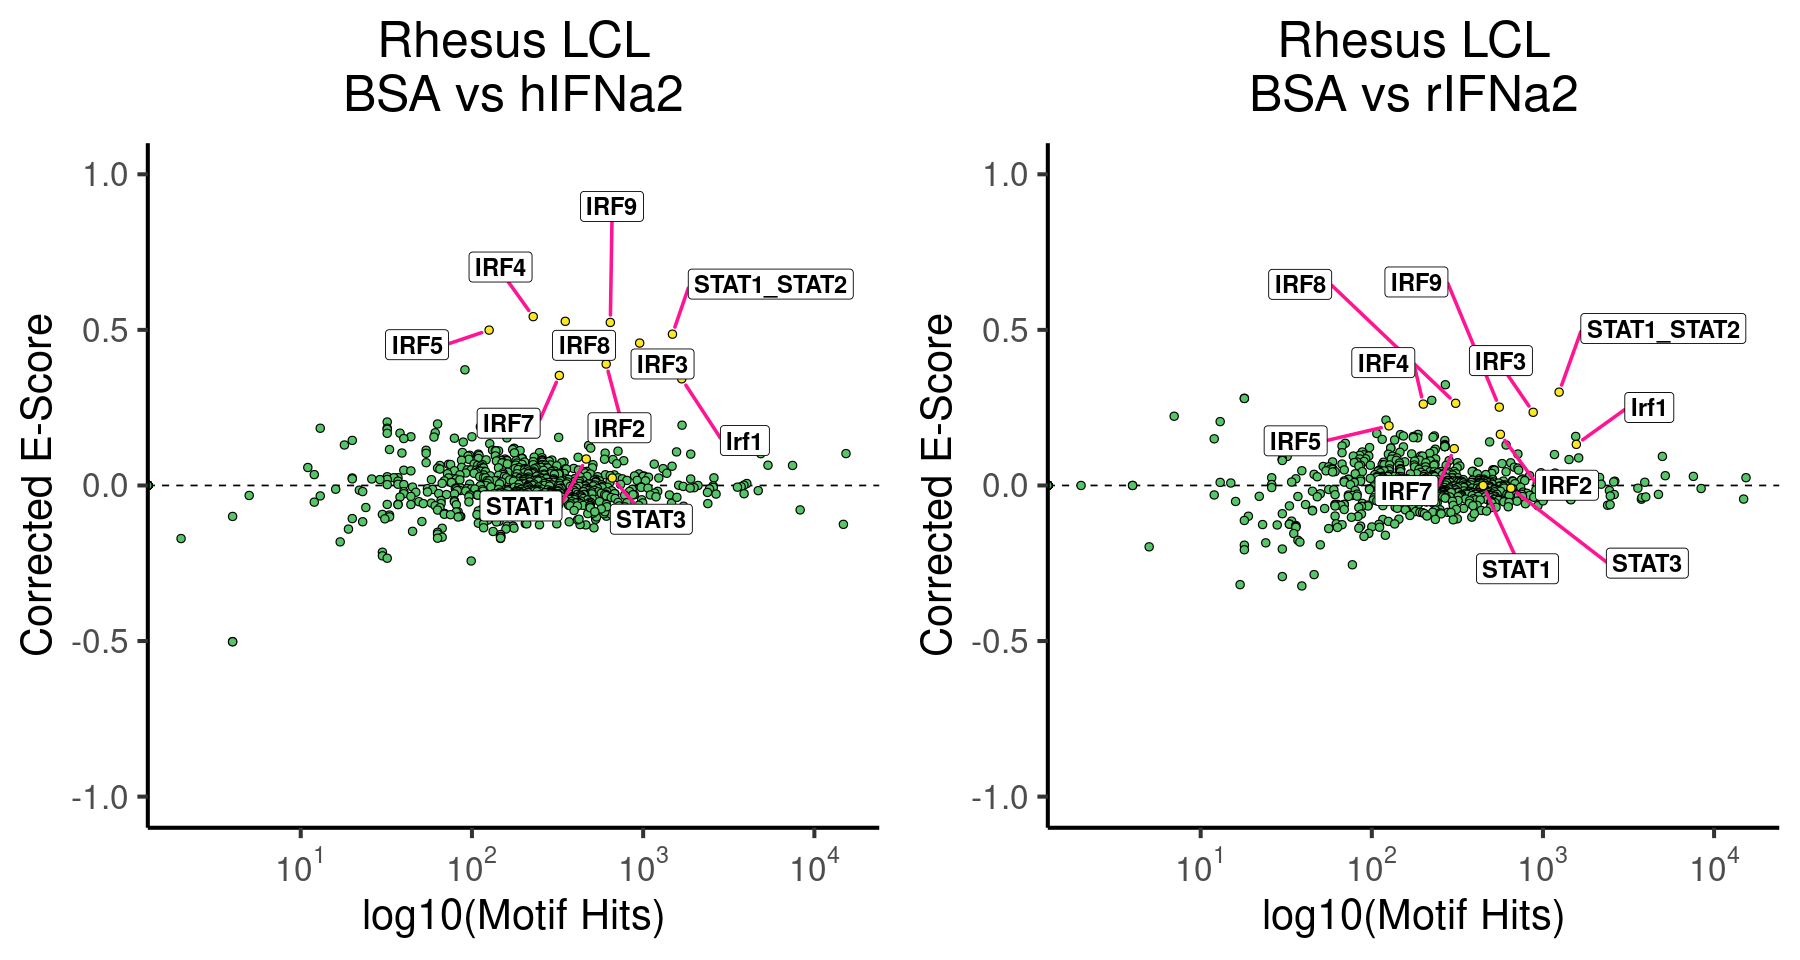

In [5]:
# Loads TFEA results tables.
tfea_table_hIFN <- read.delim(paste0("/scratch/Users/dara6367/IFNa2-cis-trans/tfea/dreg/",species,"-hIFN/results.txt"), 
                              header = FALSE, comment.char = "#")
tfea_table_rIFN <- read.delim(paste0("/scratch/Users/dara6367/IFNa2-cis-trans/tfea/dreg/",species,"-rIFN/results.txt"), 
                              header = FALSE, comment.char = "#")

# Renames results columns.
colnames(tfea_table_hIFN) <- c("TF","escore","correctedescore","events","GC","FPKM","padj","correctedpadj","replicate")
colnames(tfea_table_rIFN) <- c("TF","escore","correctedescore","events","GC","FPKM","padj","correctedpadj","replicate")

# Adds column "toLabel" to dataframes.
toLabel <- rep(NA, dim(tfea_table_hIFN)[1])
tfea_table_hIFN <- cbind(tfea_table_hIFN, toLabel)
tfea_table_rIFN <- cbind(tfea_table_rIFN, toLabel)

# Assigns TRUE to "toLabel" column in table to TP53 motif, so that it is the only one to be labelled.
# Also, to selected motifs assign "highlight" on "replicate" field so that they are uniquely colored.
motifs <- as.data.frame(c("MA0050_3_Irf1","MA0051_1_IRF2","MA1418_1_IRF3",
                          "MA1419_1_IRF4","MA1420_1_IRF5","MA0772_1_IRF7",
                          "MA0652_1_IRF8","MA0653_1_IRF9","MA0137_3_STAT1",
                          "MA0517_1_STAT1_STAT2","MA0144_2_STAT3"))

colnames(motifs) <- "TF"
tfea_table_hIFN$toLabel <- tfea_table_hIFN$TF %in% motifs$TF
tfea_table_rIFN$toLabel <- tfea_table_rIFN$TF %in% motifs$TF

# Removes initial "MA0000_[0-9]_NAME" from the TF names.
tfea_table_hIFN$TF <- gsub(".*_[0-9]_","", tfea_table_hIFN$TF)
tfea_table_rIFN$TF <- gsub(".*_[0-9]_","", tfea_table_rIFN$TF)

# Sorts concatenated dataframe so that the labelled motifs are placed to the very end, and they are plotted last.
tfea_table_hIFN <- tfea_table_hIFN[order(tfea_table_hIFN$toLabel),]
tfea_table_rIFN <- tfea_table_rIFN[order(tfea_table_rIFN$toLabel),]

# Plots motif hits on x-axis and corrected e-score on y-axis.
# With labels colored dependent if they are significant or not.

tfea_plot_hIFN <- ggplot(tfea_table_hIFN, aes(x = events, y = correctedescore, label = TF)) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 0.5) +
    geom_point(shape = 21, color = "black", size = 2, alpha = 1,
               fill = dplyr::case_when(tfea_table_hIFN$toLabel == TRUE ~ "#FDE725FF", 
                                       tfea_table_hIFN$toLabel == FALSE ~ "#55C667FF")) +
    ylim(-1.0, 1.0) +
    geom_label_repel(data = tfea_table_hIFN[tfea_table_hIFN$toLabel == TRUE,],
                     fill = "white",
                     size = 5,
                     box.padding = 1.0,
                     point.padding = 0.5,
                     segment.size = 1,
                     color = "black", 
                     fontface = "bold",
                     force = 20,
                     segment.color = "deeppink",
                     max.overlaps = 100) +
    theme_classic(base_size = 25) + 
    labs(title = paste0(species," LCL\nBSA vs hIFNa2"),
       x = "log10(Motif Hits)",
       y = "Corrected E-Score") +
    scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
                  labels = trans_format("log10", math_format(10^.x))) +
    scale_fill_manual(values = "white") +
    theme(legend.position = "none") + 
    theme(plot.title = element_text(hjust = 0.5))

tfea_plot_rIFN <- ggplot(tfea_table_rIFN, aes(x = events, y = correctedescore, label = TF)) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 0.5) +
    geom_point(shape = 21, color = "black", size = 2, alpha = 1,
               fill = dplyr::case_when(tfea_table_rIFN$toLabel == TRUE ~ "#FDE725FF", 
                                       tfea_table_rIFN$toLabel == FALSE ~ "#55C667FF")) +
    ylim(-1.0, 1.0) +
    geom_label_repel(data = tfea_table_rIFN[tfea_table_rIFN$toLabel == TRUE,],
                     fill = "white",
                     size = 5,
                     box.padding = 1.0,
                     point.padding = 0.5,
                     segment.size = 1,
                     color = "black", 
                     fontface = "bold",
                     force = 20,
                     segment.color = "deeppink",
                     max.overlaps = 100) +
    theme_classic(base_size = 25) + 
    labs(title = paste0(species," LCL\nBSA vs rIFNa2"),
       x = "log10(Motif Hits)",
       y = "Corrected E-Score") +
    scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
                  labels = trans_format("log10", math_format(10^.x))) +
    scale_fill_manual(values = "white") +
    theme(legend.position = "none") + 
    theme(plot.title = element_text(hjust = 0.5))                  
                  
# Plotting
options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(tfea_plot_hIFN, tfea_plot_rIFN, ncol = 2)

# Steinparzer2019 MEFs IFN gamma GRO-seq

In [21]:
# Define input/output paths and files for DESeq2.

species <- "MEFs"

baseDir <- "/scratch/Users/dara6367/IFNa2-cis-trans/Steinparzer2019/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"conditionsTables/")
alphaValue <- 0.05

conditionsTableFile <- paste0(tableDir,"conditionsTable.GRO-",species,"-IFNg.csv")
featureCounts <- paste0(countsDir,"GRO-",species,"-IFNg.ncbiRefSeq.without5prime25.featureCounts.RData")

# Read in count data and their conditions table.
load(featureCounts)
conditionsTable <- read.csv(conditionsTableFile, header = TRUE)

# Assign the same ID to both the conditionTables row names and the counts column names.
colnames(counts$counts) <- conditionsTable$sample
rownames(conditionsTable) <- conditionsTable$sample

# Create DESeq2Dataset object and load RNA-seq counts.
dds <- DESeqDataSetFromMatrix(countData = counts$counts, 
                              colData = conditionsTable,
                              design = ~ treatment)

# Run DESeq2 using the counts.
dds <- DESeq(dds)

# Defines conditions to compare.
contrast_withoutCorsA <- c("treatment", "IFN_untr", "unst_untr")
contrast_withCorsA <- c("treatment", "IFN_corsA", "unst_corsA")

# 'Shrink' results using 'normal' mode.
resultsUnshrunken_withoutCorsA <- results(dds, 
                                  contrast = contrast_withoutCorsA, 
                                  alpha = alphaValue)
resultsUnshrunken_withCorsA <- results(dds, 
                                  contrast = contrast_withCorsA, 
                                  alpha = alphaValue)

results_withoutCorsA <- lfcShrink(dds, 
                          contrast = contrast_withoutCorsA, 
                          res = resultsUnshrunken_withoutCorsA, 
                          type = "normal")
results_withCorsA <- lfcShrink(dds, 
                          contrast = contrast_withCorsA, 
                          res = resultsUnshrunken_withCorsA, 
                          type = "normal")

# Orders list of genes by their adjusted p-values.
results_withoutCorsA <- results_withoutCorsA[order(results_withoutCorsA$padj),]
results_withCorsA <- results_withCorsA[order(results_withCorsA$padj),]

# Filter out gene entries whose log2FoldChange has an NA value.
results_withoutCorsA_filt <- results_withoutCorsA[!is.na(results_withoutCorsA$log2FoldChange),]
results_withCorsA_filt <- results_withCorsA[!is.na(results_withCorsA$log2FoldChange),]

# Orders the gene list by log2FoldChange in decreasing order.
# And prepares it in a format that GSEA accepts.
results_withoutCorsA_filt <- results_withoutCorsA_filt[order(results_withoutCorsA_filt$log2FoldChange, decreasing = TRUE),]
results_withCorsA_filt <- results_withCorsA_filt[order(results_withCorsA_filt$log2FoldChange, decreasing = TRUE),]
rankedGenes_withoutCorsA <- results_withoutCorsA_filt$log2FoldChange
rankedGenes_withCorsA <- results_withCorsA_filt$log2FoldChange
names(rankedGenes_withoutCorsA) <- rownames(results_withoutCorsA_filt)
names(rankedGenes_withCorsA) <- rownames(results_withCorsA_filt)
rankedGenes_withoutCorsA_gsea <- rankedGenes_withoutCorsA
rankedGenes_withCorsA_gsea <- rankedGenes_withCorsA

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



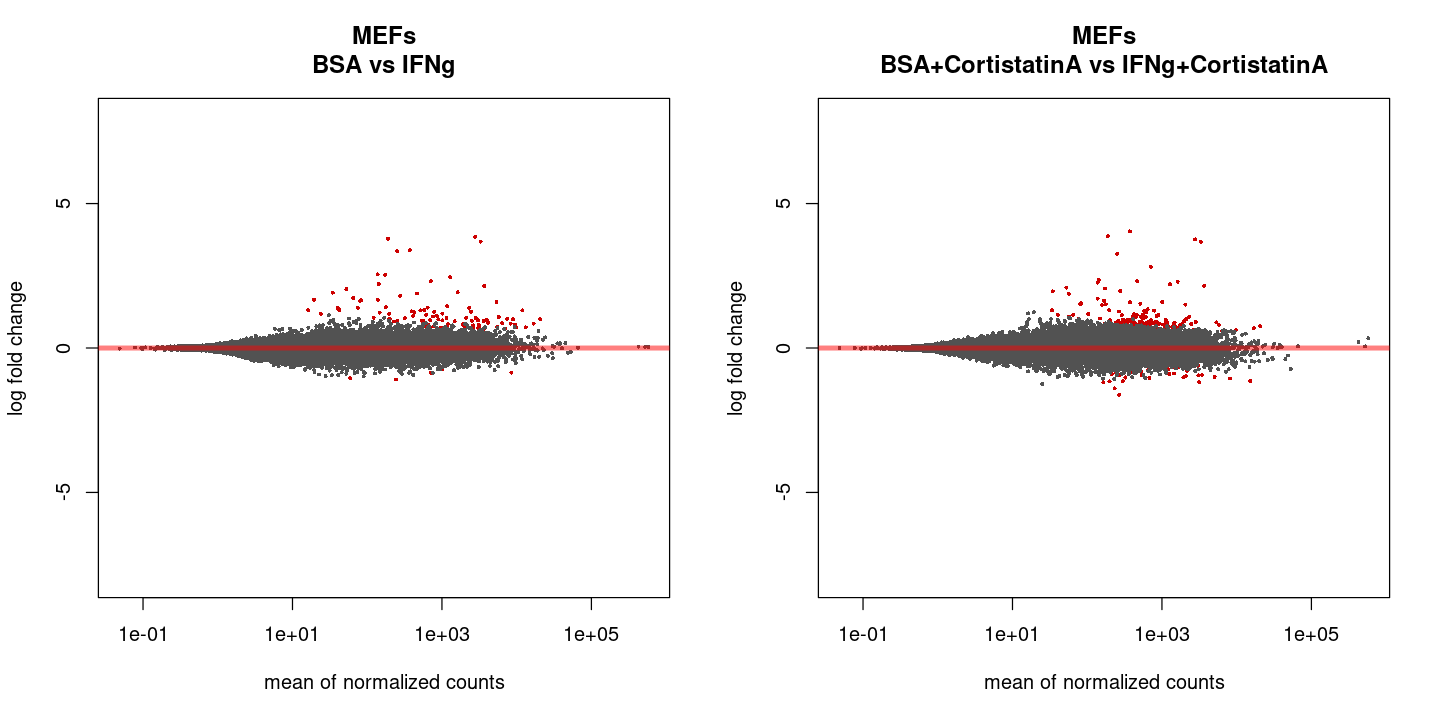

In [22]:
# Display MA plots with shrunken fold changes.

par(mfrow=c(1,2))
options(repr.plot.width = 12, repr.plot.height = 6)
DESeq2::plotMA(results_withoutCorsA, ylim = c(-8,8), main = paste0(species,"\nBSA vs IFNg"))
DESeq2::plotMA(results_withCorsA, ylim = c(-8,8), main = paste0(species,"\nBSA+CortistatinA vs IFNg+CortistatinA"))

Warning message:
“Removed 2 rows containing missing values (geom_vline).”
Warning message:
“Removed 1 rows containing missing values (geom_hline).”
Warning message:
“Removed 2 rows containing missing values (geom_vline).”
Warning message:
“Removed 1 rows containing missing values (geom_hline).”


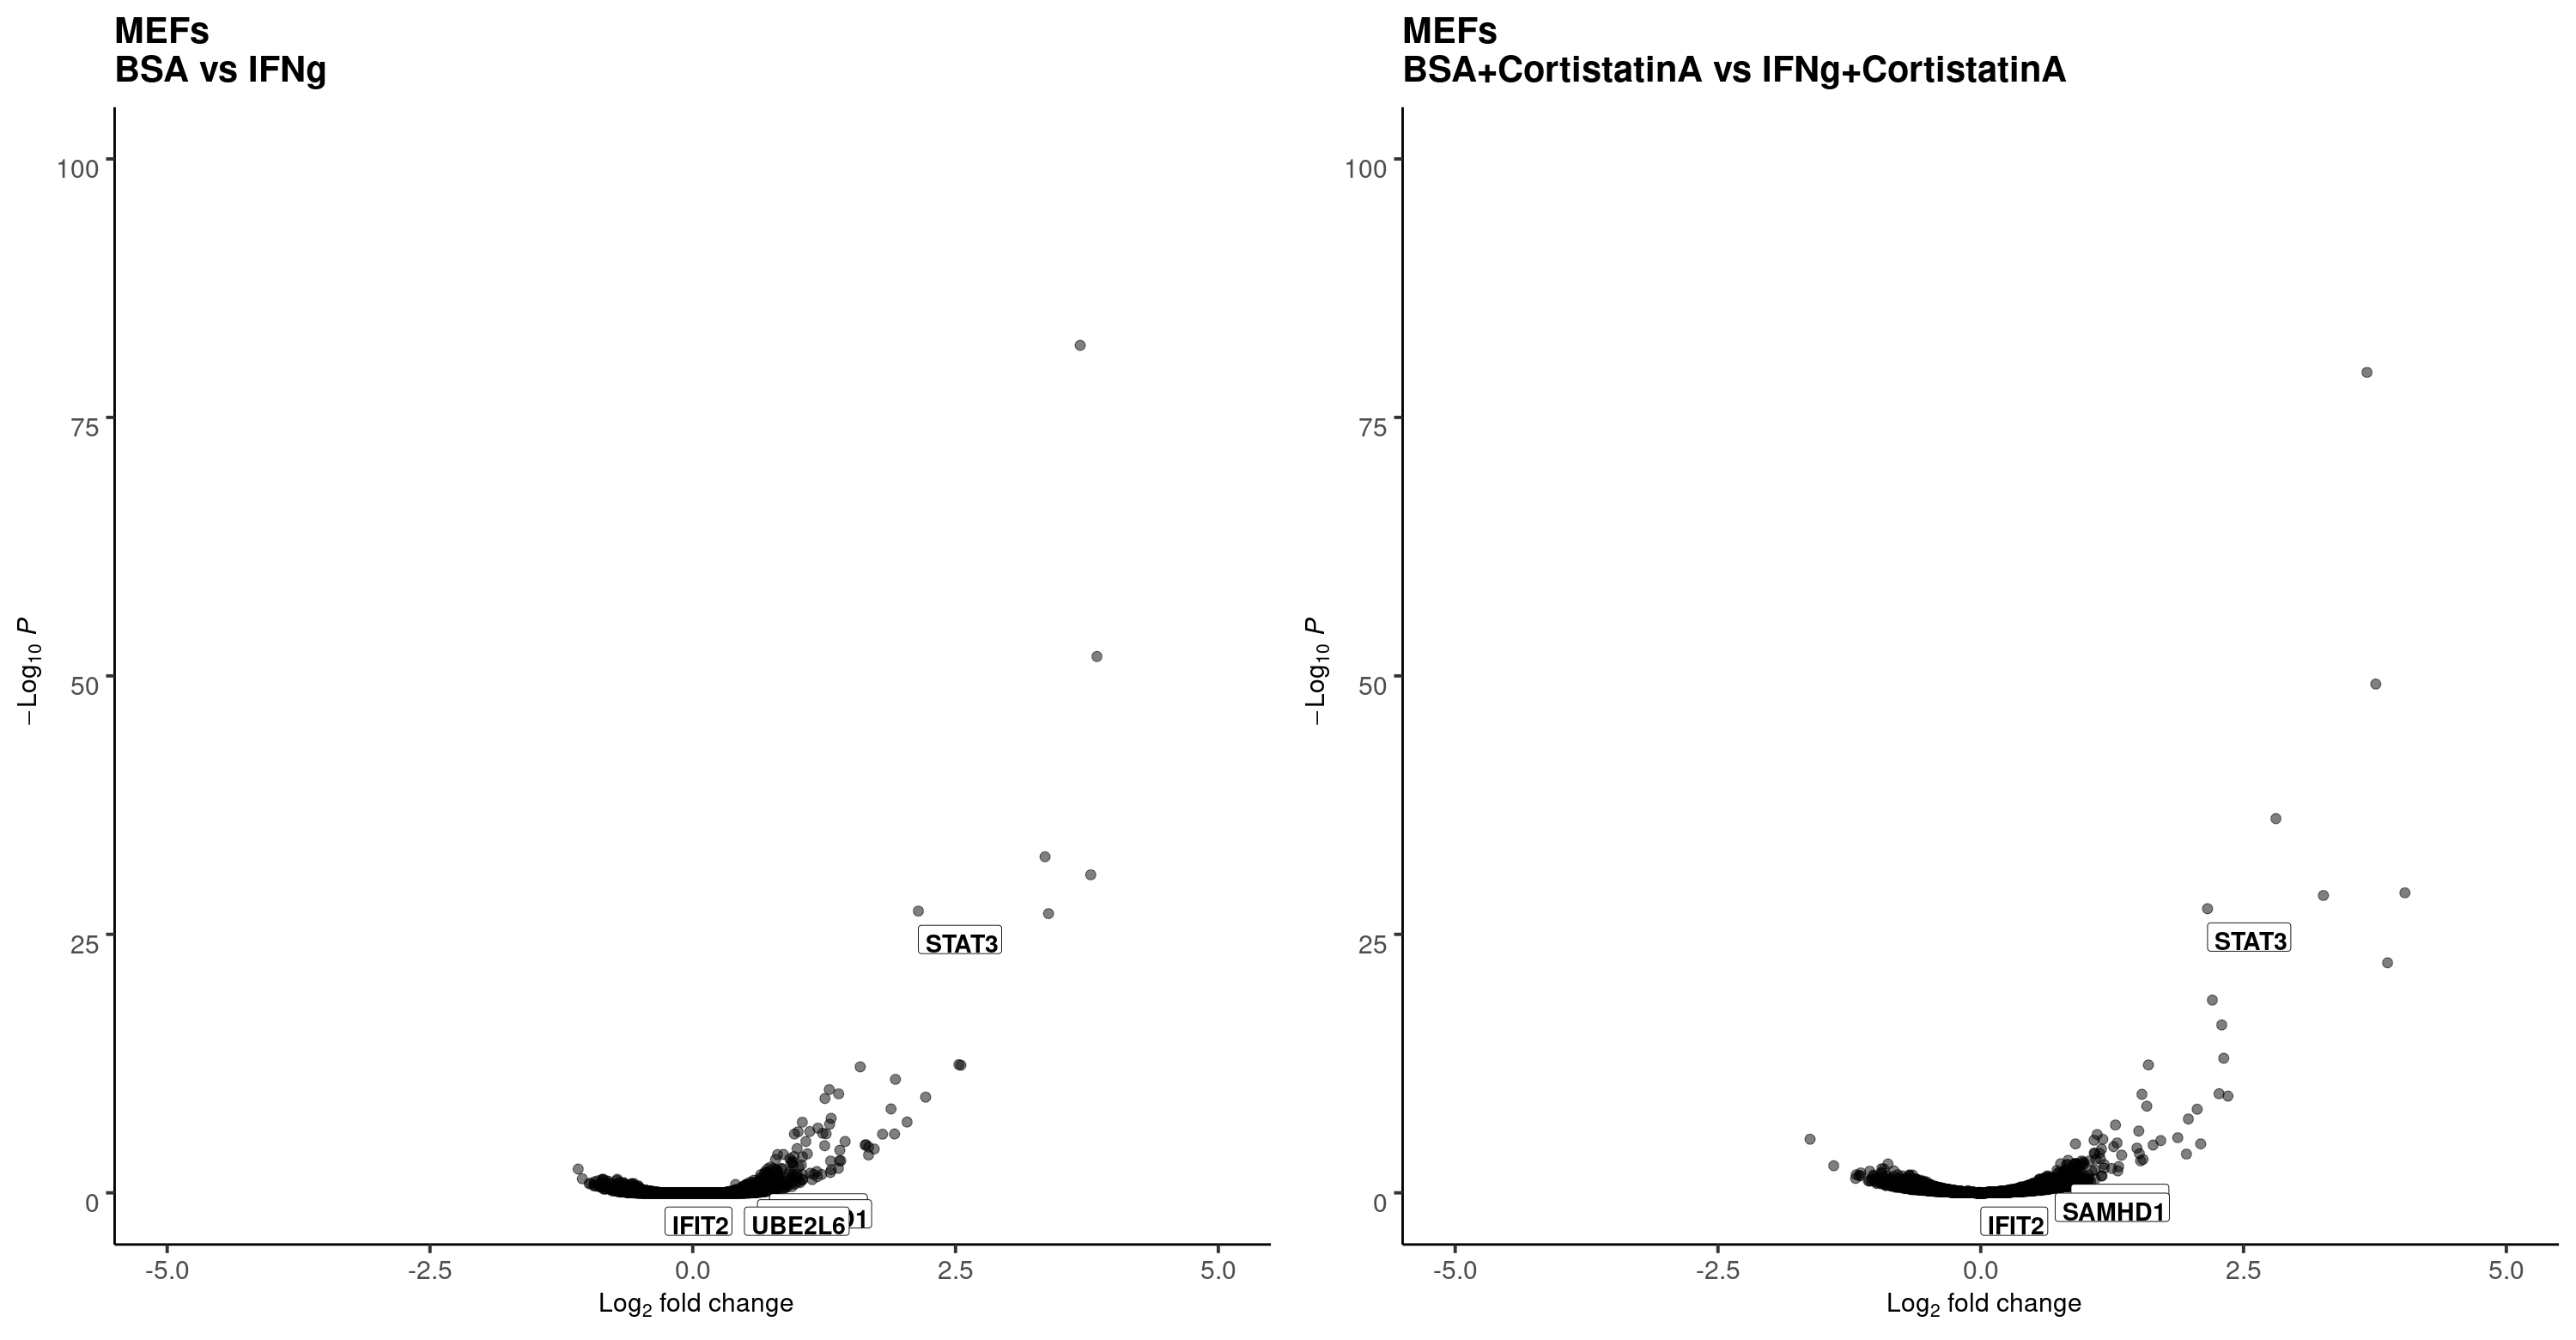

In [47]:
# Makes a volcano plot with the DESeq2 results.

volcano_withoutCorsA <- EnhancedVolcano(results_withoutCorsA,
                lab = rownames(results_withoutCorsA),
                x = "log2FoldChange",
                y = "padj",
                title = paste0(species,"\nBSA vs IFNg"),
                titleLabSize = 25,
                subtitle = NULL,
                caption = NULL,
                xlim = c(-5,5),
                ylim = c(0,100),
                pCutoff = 10e-200,
                FCcutoff = 10,
                cutoffLineType = "twodash",
                pointSize = 3.0,
                labSize = 6.0,
                selectLab = c("MX1","IFIT2","TRIM25","OASL","STAT3","SAMHD1","UBE2L6","TNFSF10"),
                boxedLabels = TRUE,
                labFace = "bold",
                col=c("black", "black", "black", "red3"),
                legendPosition = 'none',
                colAlpha = 0.5,
                gridlines.major = FALSE,
                gridlines.minor = FALSE,
                drawConnectors = FALSE)

volcano_withCorsA <- EnhancedVolcano(results_withCorsA,
                lab = rownames(results_withCorsA),
                x = "log2FoldChange",
                y = "padj",
                title = paste0(species,"\nBSA+CortistatinA vs IFNg+CortistatinA"),
                titleLabSize = 25,
                subtitle = NULL,
                caption = NULL,
                xlim = c(-5,5),
                ylim = c(0,100),
                pCutoff = 10e-200,
                FCcutoff = 10,
                cutoffLineType = "twodash",
                pointSize = 3.0,
                labSize = 6.0,
                selectLab = c("MX1","IFIT2","TRIM25","OASL","STAT3","SAMHD1","UBE2L6","TNFSF10"),
                boxedLabels = TRUE,
                labFace = "bold",
                col=c("black", "black", "black", "red3"),
                legendPosition = 'none',
                colAlpha = 0.5,
                gridlines.major = FALSE,
                gridlines.minor = FALSE,
                drawConnectors = FALSE)

# Plotting
options(repr.plot.width = 25, repr.plot.height = 13)
grid.arrange(volcano_withoutCorsA, volcano_withCorsA, ncol = 2)

Warning message in fgsea(pathways = pathways_list, stats = rankedGenes_withoutCorsA_gsea, :
“There are ties in the preranked stats (9.8% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


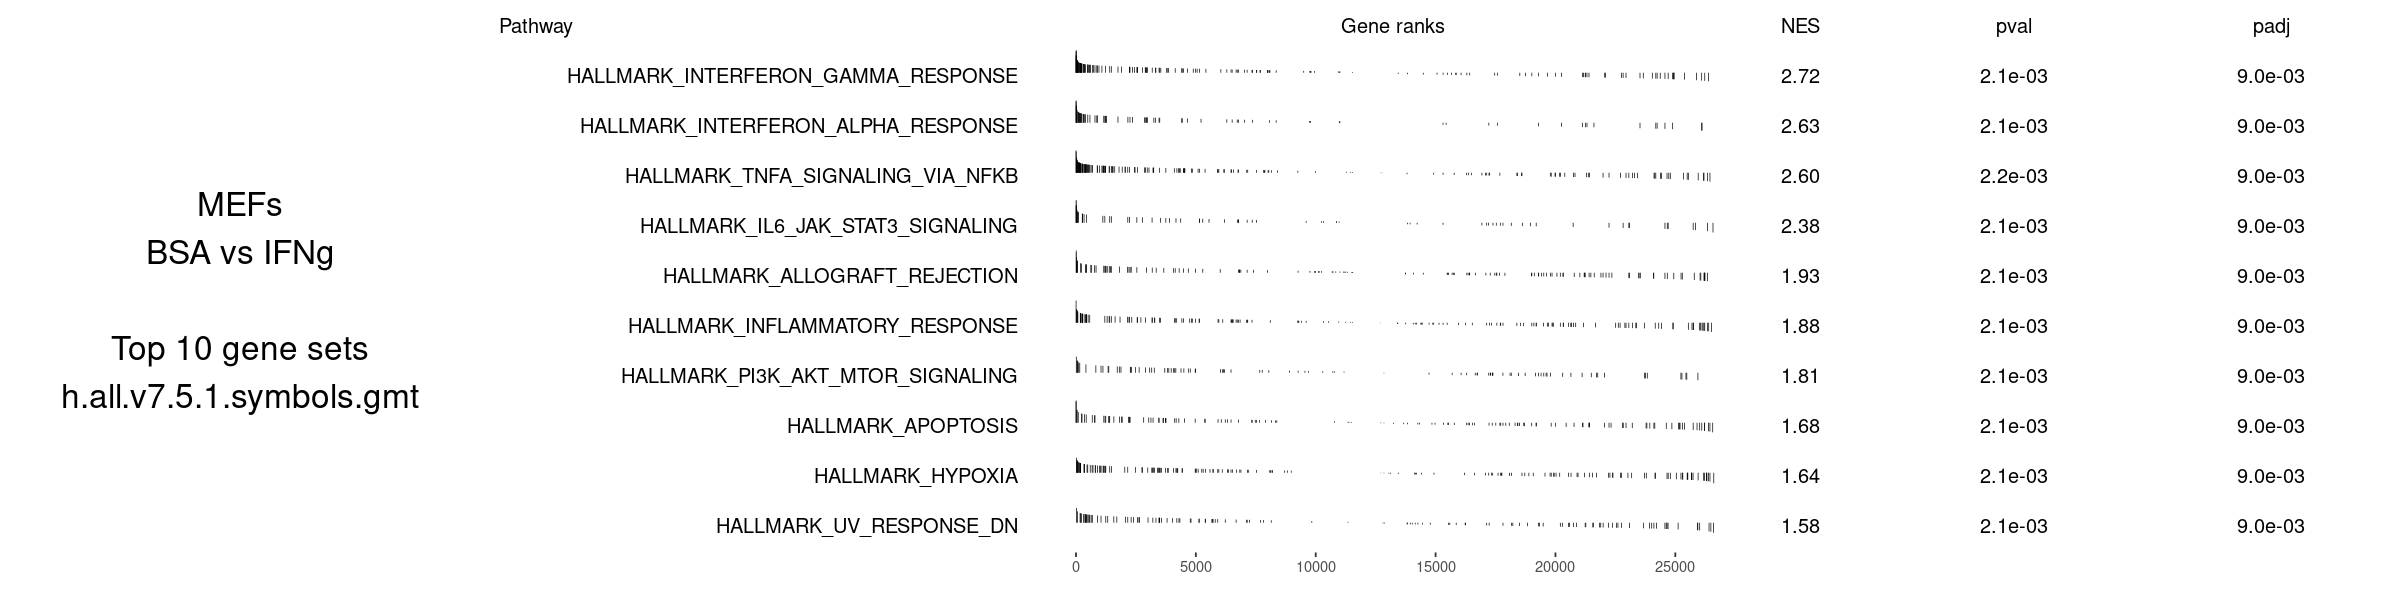

In [23]:
# Runs GSEA using the ranked gene list from DESeq2 by fold-change, and the GSEA gene set list.
fgseaRes_withoutCorsA <- fgsea(pathways = pathways_list, 
                  stats = rankedGenes_withoutCorsA_gsea,
                  minSize = 15,
                  maxSize = 1000,
                  nperm = 1000)

fgseaRes_withoutCorsA$NES <- as.numeric(fgseaRes_withoutCorsA$NES)
fgseaRes_withoutCorsA <- fgseaRes_withoutCorsA[with(fgseaRes_withoutCorsA, order(fgseaRes_withoutCorsA$NES, decreasing = TRUE)),]
                        
# Plots the enrichment curves for the 10 pathways with the highest ES score.
# Adds the plot title to the left displaying the species, comparison, and gene set used.
                        
topPathways_withoutCorsA <- fgseaRes_withoutCorsA[NES > 0][head(order(padj), n = 10), pathway]
                        
options(repr.plot.width = 20, repr.plot.height = 5)
                        
setHook("grid.newpage", function() pushViewport(viewport(x = 1,y = 1,width = 0.9, 
                                                         height = 0.9, name = "vp", 
                                                         just = c("right","top"))), action = "prepend")
        
plotGseaTable(pathways = pathways_list[topPathways_withoutCorsA], 
              stats = rankedGenes_withoutCorsA_gsea, 
              fgseaRes = fgseaRes_withoutCorsA, 
              gseaParam = 0.5)
        
setHook("grid.newpage", NULL, "replace")
grid.text(paste0(species,"\nBSA vs IFNg\n\nTop 10 gene sets\n",geneSet), x = 0.1, y = 0.5, gp = gpar(fontsize = 20))

Warning message in fgsea(pathways = pathways_list, stats = rankedGenes_withCorsA_gsea, :
“There are ties in the preranked stats (6.49% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


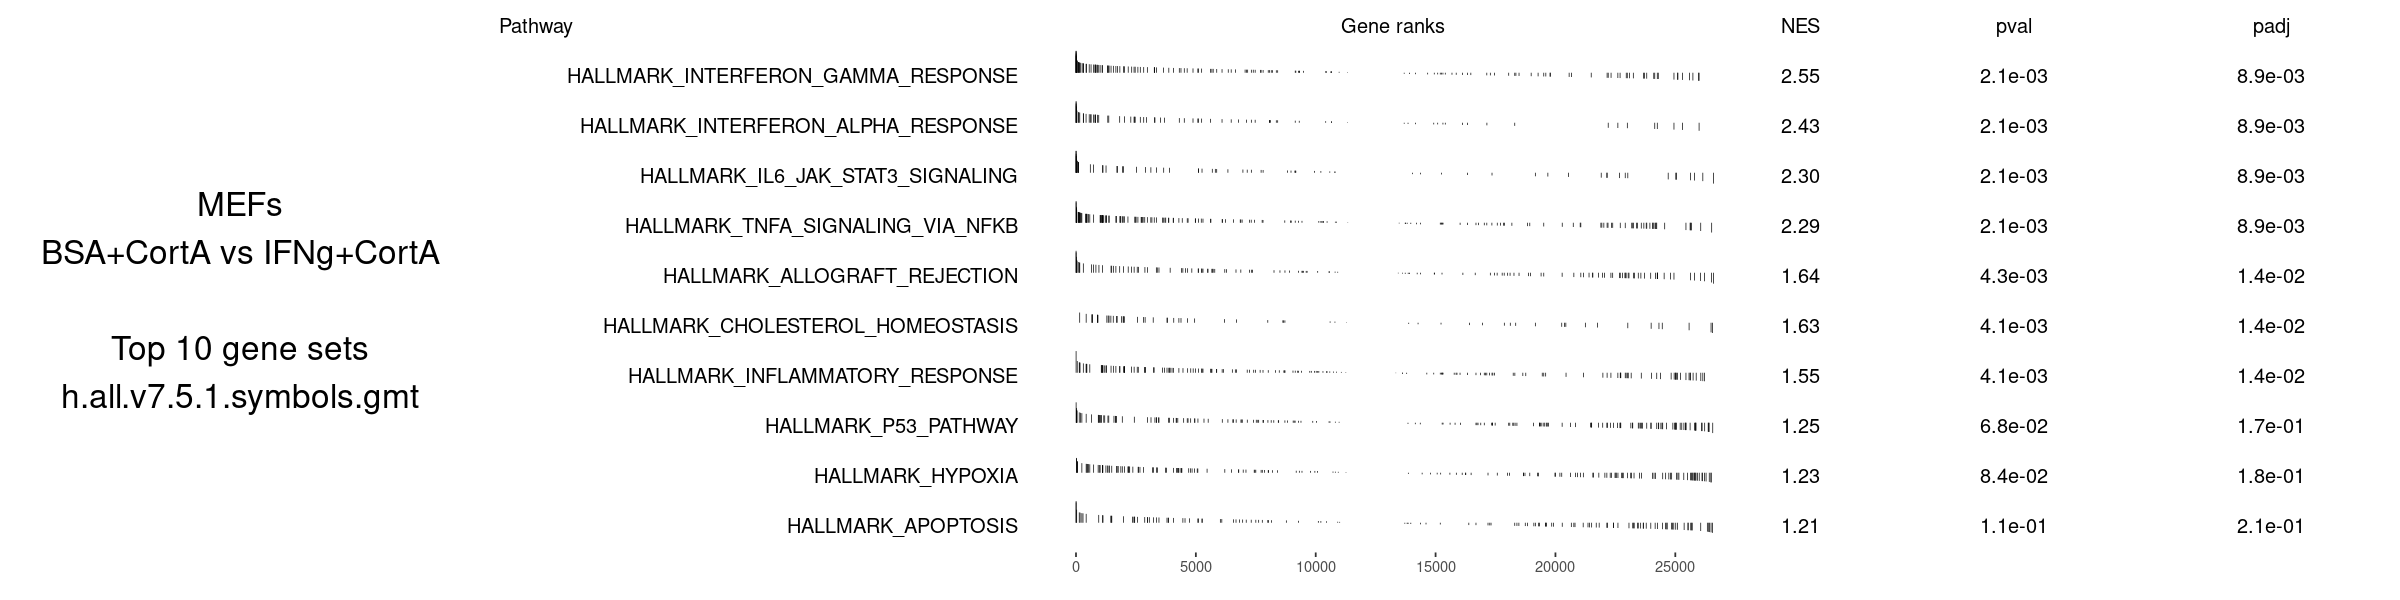

In [45]:
# Runs GSEA using the ranked gene list from DESeq2 by fold-change, and the GSEA gene set list.
fgseaRes_withCorsA <- fgsea(pathways = pathways_list, 
                  stats = rankedGenes_withCorsA_gsea,
                  minSize = 15,
                  maxSize = 1000,
                  nperm = 1000)

fgseaRes_withCorsA$NES <- as.numeric(fgseaRes_withCorsA$NES)
fgseaRes_withCorsA <- fgseaRes_withCorsA[with(fgseaRes_withCorsA, order(fgseaRes_withCorsA$NES, decreasing = TRUE)),]
                        
# Plots the enrichment curves for the 10 pathways with the highest ES score.
# Adds the plot title to the left displaying the species, comparison, and gene set used.
                        
topPathways_withCorsA <- fgseaRes_withCorsA[NES > 0][head(order(padj), n = 10), pathway]
                        
options(repr.plot.width = 20, repr.plot.height = 5)
                        
setHook("grid.newpage", function() pushViewport(viewport(x = 1,y = 1,width = 0.9, 
                                                         height = 0.9, name = "vp", 
                                                         just = c("right","top"))), action = "prepend")
        
plotGseaTable(pathways = pathways_list[topPathways_withCorsA], 
              stats = rankedGenes_withCorsA_gsea, 
              fgseaRes = fgseaRes_withCorsA, 
              gseaParam = 0.5)
        
setHook("grid.newpage", NULL, "replace")
grid.text(paste0(species,"\nBSA+CortA vs IFNg+CortA\n\nTop 10 gene sets\n",geneSet), x = 0.1, y = 0.5, gp = gpar(fontsize = 20))

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


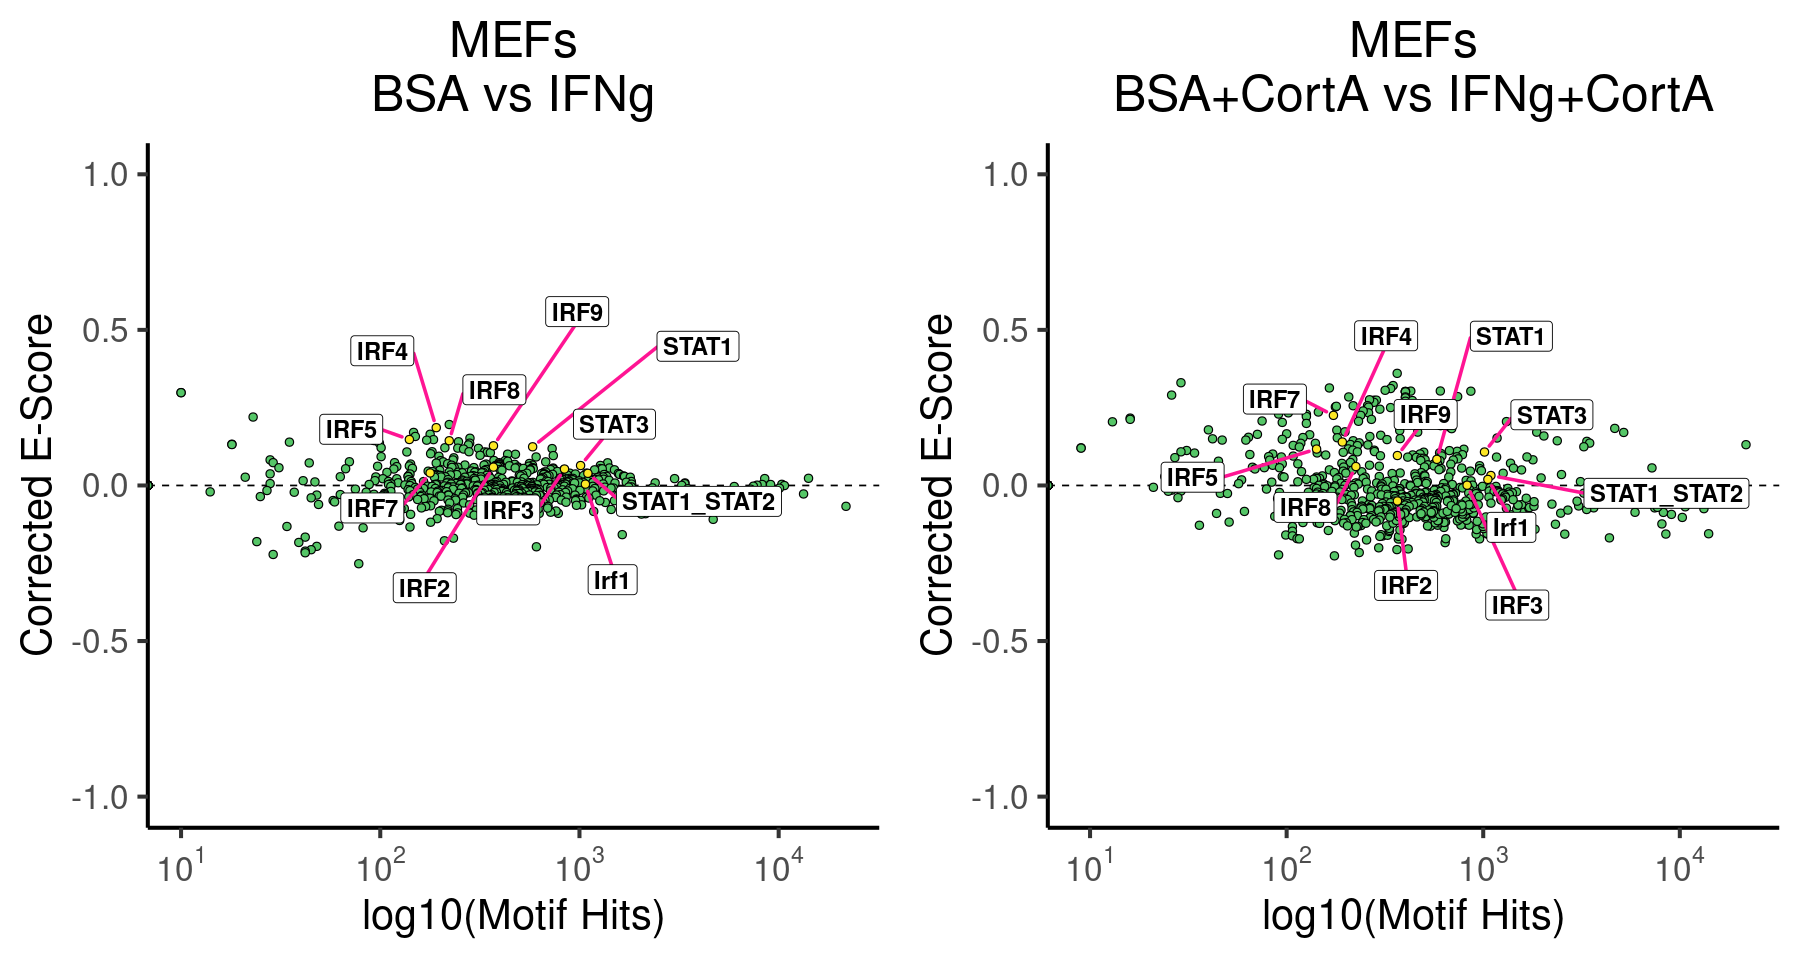

In [46]:
# Loads TFEA results tables.
tfea_table_withoutCorsA <- read.delim(paste0("/scratch/Users/dara6367/IFNa2-cis-trans/Steinparzer2019/tfea/without_cortistatinA/results.txt"), 
                              header = FALSE, comment.char = "#")
tfea_table_withCorsA <- read.delim(paste0("/scratch/Users/dara6367/IFNa2-cis-trans/Steinparzer2019/tfea/with_cortistatinA/results.txt"), 
                              header = FALSE, comment.char = "#")

# Renames results columns.
colnames(tfea_table_withoutCorsA) <- c("TF","escore","correctedescore","events","GC","FPKM","padj","correctedpadj","replicate")
colnames(tfea_table_withCorsA) <- c("TF","escore","correctedescore","events","GC","FPKM","padj","correctedpadj","replicate")

# Adds column "toLabel" to dataframes.
toLabel <- rep(NA, dim(tfea_table_withoutCorsA)[1])
tfea_table_withoutCorsA <- cbind(tfea_table_withoutCorsA, toLabel)
tfea_table_withCorsA <- cbind(tfea_table_withCorsA, toLabel)

# Assigns TRUE to "toLabel" column in table to TP53 motif, so that it is the only one to be labelled.
# Also, to selected motifs assign "highlight" on "replicate" field so that they are uniquely colored.
motifs <- as.data.frame(c("MA0050_3_Irf1","MA0051_1_IRF2","MA1418_1_IRF3",
                          "MA1419_1_IRF4","MA1420_1_IRF5","MA0772_1_IRF7",
                          "MA0652_1_IRF8","MA0653_1_IRF9","MA0137_3_STAT1",
                          "MA0517_1_STAT1_STAT2","MA0144_2_STAT3"))

colnames(motifs) <- "TF"
tfea_table_withoutCorsA$toLabel <- tfea_table_withoutCorsA$TF %in% motifs$TF
tfea_table_withCorsA$toLabel <- tfea_table_withCorsA$TF %in% motifs$TF

# Removes initial "MA0000_[0-9]_NAME" from the TF names.
tfea_table_withoutCorsA$TF <- gsub(".*_[0-9]_","", tfea_table_withoutCorsA$TF)
tfea_table_withCorsA$TF <- gsub(".*_[0-9]_","", tfea_table_withCorsA$TF)

# Sorts concatenated dataframe so that the labelled motifs are placed to the very end, and they are plotted last.
tfea_table_withoutCorsA <- tfea_table_withoutCorsA[order(tfea_table_withoutCorsA$toLabel),]
tfea_table_withCorsA <- tfea_table_withCorsA[order(tfea_table_withCorsA$toLabel),]

# Plots motif hits on x-axis and corrected e-score on y-axis.
# With labels colored dependent if they are significant or not.

tfea_plot_withoutCorsA <- ggplot(tfea_table_withoutCorsA, aes(x = events, y = correctedescore, label = TF)) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 0.5) +
    geom_point(shape = 21, color = "black", size = 2, alpha = 1,
               fill = dplyr::case_when(tfea_table_withoutCorsA$toLabel == TRUE ~ "#FDE725FF", 
                                       tfea_table_withoutCorsA$toLabel == FALSE ~ "#55C667FF")) +
    ylim(-1.0, 1.0) +
    geom_label_repel(data = tfea_table_withoutCorsA[tfea_table_withoutCorsA$toLabel == TRUE,],
                     fill = "white",
                     size = 5,
                     box.padding = 1.0,
                     point.padding = 0.5,
                     segment.size = 1,
                     color = "black", 
                     fontface = "bold",
                     force = 20,
                     segment.color = "deeppink",
                     max.overlaps = 100) +
    theme_classic(base_size = 25) + 
    labs(title = paste0(species,"\nBSA vs IFNg"),
       x = "log10(Motif Hits)",
       y = "Corrected E-Score") +
    scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
                  labels = trans_format("log10", math_format(10^.x))) +
    scale_fill_manual(values = "white") +
    theme(legend.position = "none") + 
    theme(plot.title = element_text(hjust = 0.5))

tfea_plot_withCorsA <- ggplot(tfea_table_withCorsA, aes(x = events, y = correctedescore, label = TF)) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 0.5) +
    geom_point(shape = 21, color = "black", size = 2, alpha = 1,
               fill = dplyr::case_when(tfea_table_withCorsA$toLabel == TRUE ~ "#FDE725FF", 
                                       tfea_table_withCorsA$toLabel == FALSE ~ "#55C667FF")) +
    ylim(-1.0, 1.0) +
    geom_label_repel(data = tfea_table_withCorsA[tfea_table_withCorsA$toLabel == TRUE,],
                     fill = "white",
                     size = 5,
                     box.padding = 1.0,
                     point.padding = 0.5,
                     segment.size = 1,
                     color = "black", 
                     fontface = "bold",
                     force = 20,
                     segment.color = "deeppink",
                     max.overlaps = 100) +
    theme_classic(base_size = 25) + 
    labs(title = paste0(species,"\nBSA+CortA vs IFNg+CortA"),
       x = "log10(Motif Hits)",
       y = "Corrected E-Score") +
    scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
                  labels = trans_format("log10", math_format(10^.x))) +
    scale_fill_manual(values = "white") +
    theme(legend.position = "none") + 
    theme(plot.title = element_text(hjust = 0.5))                  
                  
# Plotting
options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(tfea_plot_withoutCorsA, tfea_plot_withCorsA, ncol = 2)